# Walkthrough of weaving draft generator code

**(Plus a library of a few common drafts)**

Elizabeth Pankratz, December 2022

In [1]:
import draftmaker as dm
import numpy as np

## Anatomy of a weaving draft

A typical weaving draft looks something like this:

![blabla](sample_drafts/2x2twill_herringbone.png)

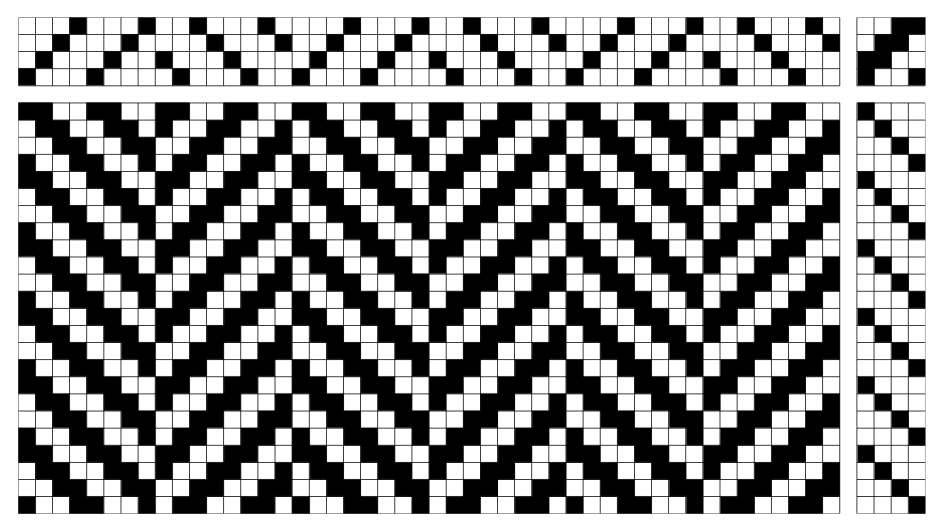

In [2]:
from IPython.display import Image
Image(filename="sample_drafts/2x2twill_herringbone.png")

It has four components.

1) **The tie-up (top right):** how each of the loom's treadles are tied to each of its harnesses.  Each row represents one harness, and each column represents one treadle.  A black cell means that that column's treadle is tied up to that row's harness.  One treadle can be tied to many harnesses, and one harness can be attached to multiple treadles.

2) **The threading (top left):** the harness that each warp end is threaded through.  Each row represents one harness, and each column represents one warp end, i.e., one thread in the warp.  A black cell means that the given warp end is threaded through the given harness.  Each warp end can only be threaded through one harness.

3) **The treadling (bottom right):** the order in which the treadles are pressed down.  Each row represents one weft pick, i.e., one row of the woven fabric, and each column represents one treadle.  A black cell means that for that weft pick, the given treadle is pressed down.  Multiple treadles can be pressed down in a single row.

4) **The fabric drawdown (bottom left):** jointly determined by the tie-up, the treadling, and the threading.  Each row represents one weft pick, and each column represents one warp end.  A black cell means that for that intersection of warp and weft, the warp thread is on top.  A white cell means that the weft thread is on top.

For a very clear explanation and illustration of the role of each of these components, see [this page by Lauren Nishizaki](https://observablehq.com/@lemonnish/generate-a-weaving-draft#cell-158).

This notebook will outline how each of the components in 1–3 are defined before showing how they come together to create the fabric in 4.

### 1) The tie-up

The tie-up is represented as an array of arrays.
The outer array contains one array for each harness, *ordered from bottom to top*.
In other words, the array at index 0 is the bottom row in the tie-up in the diagram above.
Each inner array contains one Boolean value (0/1) per treadle, ordered from left to right.
A 1 represents that the given treadle is tied up to the given harness (black on the tie-up diagram), and a 0 represents that the given treadle is not tied up to the given harness (white on the tie-up diagram).

So, the tie-up for the 2x2 twill shown above would be represented as:

```
[[1, 0, 0, 1],
 [1, 1, 0, 0],
 [0, 1, 1, 0],
 [0, 0, 1, 1]]
```

Note that the zeroth index of the outer array, `[1, 0, 0, 1]`, corresponds to the bottom row of the following tie-up diagram:

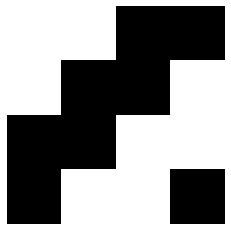

In [3]:
twill2x2_tieup = np.array([[1, 0, 0, 1], [1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]])
dm.display_tieup(twill2x2_tieup)

### 2) The threading

The threading is represented as a one-dimensional array containing integers >= 0.
Each integer reflects the harness that the given thread goes through (ordered from left to right).
The harnesses are zero-indexed.

So, a straight threading (unlike the one in the example draft above—but we'll get there soon!) would be represented as:

```
[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
```

We can generate the threading array more efficiently by repeating the four-end pattern a few times.
Here's how it looks on its own.

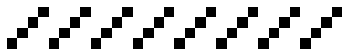

In [4]:
# The 4 in the variable name indicates that this threading involves four harnesses.
straight_thread_4 = np.array([0, 1, 2, 3] * 8)
dm.display_threading(straight_thread_4)

### 3) The treadling

The treadling is represented as an array of arrays.
The outer array contains one array per weft row, ordered from top to bottom.
Each inner array contains integers >= 0 representing which treadle(s) are pressed down for the given row.
Like the harnesses, the treadles are zero-indexed.

The straight treadling shown in the example draft above would be represented as:

```
[[0],
 [1],
 [2],
 [3],
 [0],
 [1],
 [2],
 [3],
 [0],
 [1],
 [2],
 [3]]
```

Again, this pattern can be encoded more succinctly by repeating the first four rows some number of times.

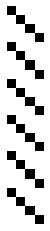

In [5]:
# The 4 in the variable name indicates that this treadling is over four treadles.
straight_treadle_4 = np.array([[0], [1], [2], [3]] * 6)
dm.display_treadling(straight_treadle_4)

### 4) The fabric drawdown

The fabric is produced as a function of the tie-up, the treadling, and the threading.

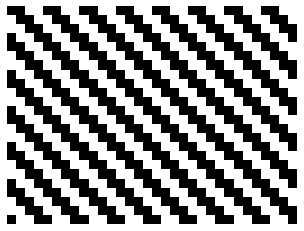

In [6]:
twill2x2_fabric = dm.gen_fabric(twill2x2_tieup, straight_treadle_4, straight_thread_4)
dm.display_fabric(twill2x2_fabric)

### Putting it all together: A full draft

The function `dm.display_full_draft()` creates the traditionally-formatted weaving draft given a tie-up specification, a threading specification, and a treadling specification.

This function also has three optional arguments:

- `n_pixel_sep=` can be any integer >= 0, indicating how many cells of padding should separate the four components of the draft (default 1).
- `overlay_grid=` can be either `True` (default) or `False`, indicating whether the draft components should be displayed with a grid over top.
- `pdf_filename=` can be any string ending in `".pdf"` that gives the location where the draft should be saved. If left unspecified, the default value `None` means that no plot will be saved. (PDF format is used because I find that rasterised images look less nice.)

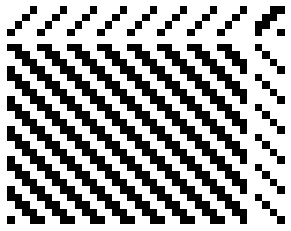

In [7]:
# Gridlines off
dm.display_full_draft(twill2x2_tieup, straight_thread_4, straight_treadle_4, overlay_grid=False)

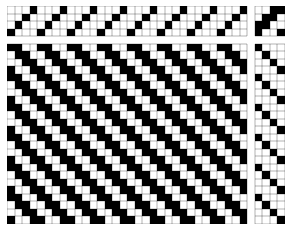

In [8]:
# Turn gridlines on and save PDF to subdirectory
dm.display_full_draft(twill2x2_tieup, straight_thread_4, straight_treadle_4, pdf_filename='sample_drafts/2x2twill_straight.pdf')

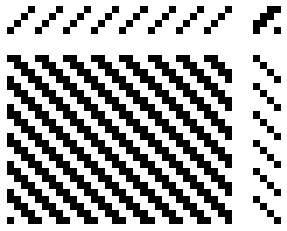

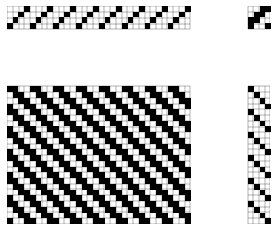

In [9]:
# Change the amount of padding
dm.display_full_draft(twill2x2_tieup, straight_thread_4, straight_treadle_4, n_pixel_sep=3, overlay_grid=False)
dm.display_full_draft(twill2x2_tieup, straight_thread_4, straight_treadle_4, n_pixel_sep=10, overlay_grid=True)

## Switching out components to create new fabrics

To generate the weaving draft shown at the beginning of this notebook, all we need to do is change from the straight threading to a herringbone threading.
The 2x2 twill tie-up and straight treadling stay the same.

The herringbone threading looks like this:

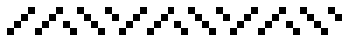

In [10]:
# Define one repeat as a list of integers
herringbone_rep = [0, 1, 2, 3] * 2 + [1, 0, 3, 2] * 2
# Concatenate that list with itself a few times to get the full threading
herringbone_thread = np.array(np.concatenate([herringbone_rep] * 3))

dm.display_threading(herringbone_thread)

And the resulting draft, using the same tie-up and treadling but the new herringbone threading, looks like this:

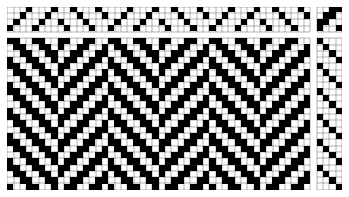

In [11]:
dm.display_full_draft(twill2x2_tieup, herringbone_thread, straight_treadle_4)

## A few other common drafts

### Plain weave (a.k.a. tabby)

The most basic woven fabric structure.
Needs two harnesses, two treadles.

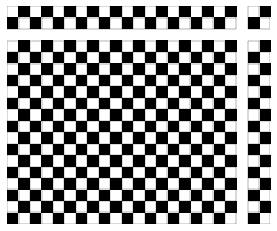

In [12]:
pw_tieup = np.array([[1, 0], [0, 1]])
straight_thread_2 = np.array([0, 1] * 10)
straight_treadle_2 = np.array([[1], [0]] * 8)
dm.display_full_draft(pw_tieup, straight_thread_2, straight_treadle_2)

### 2x2 twill interspersed with plain weave

Needs four harnesses, six treadles.
An example of mixing two different weave structures in the same draft.

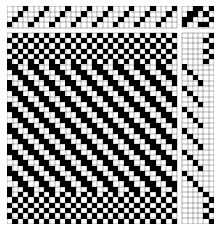

In [13]:
pw_twill2x2_tieup = np.array([[1, 0, 0, 1, 1, 0], [1, 1, 0, 0, 0, 1], [0, 1, 1, 0, 1, 0], [0, 0, 1, 1, 0, 1]])
pw_treadle = [[4], [5]] * 3
pw_twill2x2_treadle = np.concatenate((np.flip(pw_treadle), straight_treadle_4, pw_treadle))
dm.display_full_draft(pw_twill2x2_tieup, straight_thread_4, pw_twill2x2_treadle)

### 2x2 twill (bird's eye)

Needs four harnesses, four treadles.
An example of converting a threading pattern to an identical treadling pattern using list comprehension.

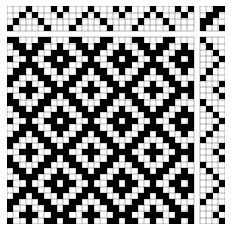

In [14]:
birdseye_rep = [0, 1, 2, 3, 2, 1, 0, 3, 2, 3]
birdseye_thread = np.concatenate([birdseye_rep] * 3)
birdseye_treadle = np.array([[x] for x in birdseye_thread])
dm.display_full_draft(twill2x2_tieup, birdseye_thread, birdseye_treadle)

### 3x1 twill

Needs four harnesses, four treadles. An example of how changing only the tie-up, but using the same straight treadling and threading as above, produces a different fabric.

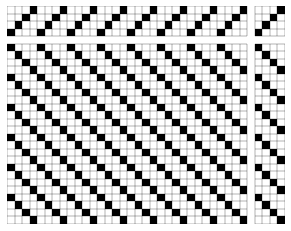

In [15]:
twill3x1_tieup = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
dm.display_full_draft(twill3x1_tieup, straight_thread_4, straight_treadle_4)

### 3x1 block twill (a.k.a. two-block twill, a.k.a. turned twill)

Needs eight harnesses, eight treadles.
A detailed explanation of how block twill works can be found [here](https://www.lambontheloom.com/blog/category/block-twill).

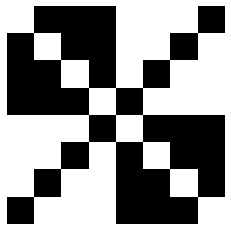

In [16]:
# We can get the more complex 3x1 block twill tie-up by manipulating the 3x1 twill tie-up.
block_a = twill3x1_tieup
# dm.display_tieup(block_a)
block_b = np.ones((4, 4)) - np.rot90(twill3x1_tieup)
# dm.display_tieup(block_b)

blocktwill_tieup = np.row_stack(
    ( 
        np.column_stack((block_a, block_b)), 
        np.column_stack((block_b, block_a))
    )
)

dm.display_tieup(blocktwill_tieup)

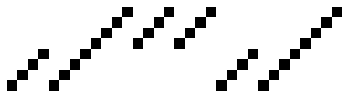

In [17]:
blocktwill_thread = np.concatenate(
    (
        straight_thread_4[:8],
        straight_thread_4[:12] + 4,
        straight_thread_4[:8],
        straight_thread_4[:4] + 4
    )
)

dm.display_threading(blocktwill_thread)

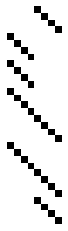

In [18]:
straight_treadle_4[:8] + 4
straight_thread_4[:8] + 4

blocktwill_treadle = np.concatenate(
    (
        straight_treadle_4[:4] + 4,
        straight_treadle_4[:12],
        straight_treadle_4[:4] + 4,
        straight_treadle_4[:4],
        straight_treadle_4[:8] + 4
    )
)

dm.display_treadling(blocktwill_treadle)

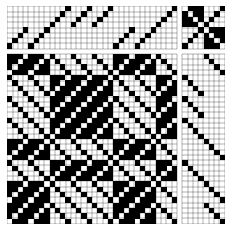

In [19]:
dm.display_full_draft(blocktwill_tieup, blocktwill_thread, blocktwill_treadle)

### Waffle weave

Needs four harnesses, five treadles.

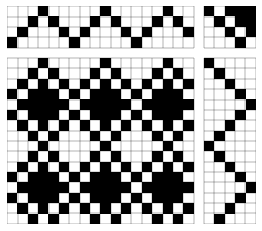

In [20]:
waffle_tieup = np.array([[0,0,0,1,0], [0,0,1,0,1], [0,1,0,1,1], [1,0,1,1,1]])
zigzag_thread_4 = np.array([0,1,2,3,2,1] * 3)
zigzag_treadle_5 = np.array([[x] for x in [0,1,2,3,4,3,2,1] * 2])
dm.display_full_draft(waffle_tieup, zigzag_thread_4, zigzag_treadle_5)